In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

In [ ]:
X, y = mnist["data"], mnist["target"] #70,000 images and 784 features each
X.shape

In [ ]:
y.shape

In [ ]:
X[0]

In [ ]:
X[0].reshape(28, 28)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
y[0]

In [ ]:
import numpy as np
y = y.astype(np.uint8)

In [ ]:
y[0]

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train

In [ ]:
y_train_5 = (y_train == 5) #true for all 5s, false for other digits
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train ,y_train_5):
    clone_clf = clone(sgd_clf)
    print(train_index[:10])
    print(train_index[-10:])
    print(test_index[:10])
    print(test_index[-10:])
    
    X_train_folds = X_train[train_index]
    print("X_train: " + str(X_train_folds.shape))
    
    y_train_folds = y_train_5[train_index]
    print("y_train: " + str(y_train_folds.shape))
    
    X_test_fold = X_train[test_index]
    print("X_test: " + str(X_test_fold.shape))
    
    y_test_fold = y_train_5[test_index]
    print("y_test: " + str(y_test_fold.shape))
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) #prints 0.9502, 0.96565, and 0.96495

In [ ]:
uy = np.bincount(y_train_5)
uyy = np.nonzero(uy)[0]
np.vstack((uyy,uy[uyy])).T

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf ,X_train ,y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1),dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#demonstrates that accuracy is not a good performance measure
#for classifiers due to skewed datasets

In [ ]:
#confusion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

In [ ]:
y_train_perfect_predictions = y_train_5 #pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4344 / (4344 +1307)

In [ ]:
recall_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1077)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
  #  plt.xlim([-100000, 100000])

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b-")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
  #  plt.xlim([-100000, 100000])

plot_precision_vs_recall(precisions, recalls)
plt.show()

In [ ]:
y_train_pred_90 = (y_scores > 4000)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

In [ ]:
recall_score(y_train_5, y_train_pred_90)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                    method = "predict_proba")

In [ ]:
y_probas_forest

In [ ]:
y_scores_forest = y_probas_forest[:,1] # score = probab of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
p = 1.1324
'%.3f'%p
np.set_printoptions(formatter={'float': lambda x: '{0:.1f}'.format(x)})

In [ ]:
uniqw, cnts = np.unique(y_scores_forest,return_counts=True)
print(uniqw)
print(cnts)
np.vstack((uniqw,cnts))

In [ ]:
y_prob_predict = (y_scores_forest > .5)

In [ ]:
precision_score(y_train_5, y_prob_predict)

In [ ]:
recall_score(y_train_5, y_prob_predict)

In [ ]:
y_probas_forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [ ]:
precision_score(y_train_5, y_probas_forest_pred)

In [ ]:
recall_score(y_train_5, y_probas_forest_pred)

In [ ]:
some_digit
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

In [ ]:
np.argmax(some_digit_scores)

In [ ]:
sgd_clf.classes_

In [ ]:
sgd_clf.classes_[5]

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

In [ ]:
len(ovo_clf.estimators_)

In [ ]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

In [ ]:
forest_clf.predict_proba([some_digit])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
sgd_clf = SGDClassifier(random_state=42, max_iter=2000)

from sklearn.preprocessing import StandardScaler #review this from ch2
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums

In [ ]:
#%matplotlib inline 
#only in a jupyter notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_int = np.array(list(map(int,y_train)))
y_train_large = (y_train_int >= 7)
y_train_odd = (y_train_int % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
y_train_large[:10]

In [ ]:
y_train_odd[:10]

In [ ]:
y_multilabel[:10]

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [ ]:
#f1_score2(y_multilabel, y_train_knn_pred, average="weighted")

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digits(clean_digit)

In [ ]:
plot_digits(X_train[0])

In [ ]:
# EXERCISE 1: KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_neighbors': [3, 6] ,'weights':['distance','uniform']}
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=4,
                           #scoring = 'neg_mean_squared_error',
                         #  return_train_score = True
                           verbose=3,
                           n_jobs=2,)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
# EXERCISE 2: TRAINING SET EXPANSION

In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shiftarray (intarray,direction):
    orig = intarray.reshape((28,28))
    if direction == 'left':
        shifted = shift(orig,[0,-1],cval=0)
    elif direction == 'right':
        shifted = shift(orig,[0,1],cval=0)
    elif direction == 'up':
        shifted = shift(orig,[-1,0],cval=0)
    elif direction == 'down':
        shifted = shift(orig,[1,0],cval=0)
    return shifted.reshape([-1])

In [ ]:
some_digit_image = shiftarray(X[0],'left').reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [ ]:
plt.imshow(X[0].reshape(28, 28), cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [122]:
#just bullshit
y = list(("6+8j", "86j", "54j"))
#y = complex(6+8j)
x = map(complex,y)
z = [x]
#display x:
print(x)

#display the data type of x:
print(type(x)) 

<class 'map'>


In [ ]:
# EXERCISE 3: TITANIC DATASET

In [156]:
import os

TITANIC_PATH = os.path.join("datasets", "titanic")
print(TITANIC_PATH)
filename = "/Volumes/lin/MachineLearning"

datasets/titanic


In [157]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(TITANIC_PATH, filename)
    return pd.read_csv(csv_path)

In [158]:
print (filename)
print (os.path.join(TITANIC_PATH, filename))

/Volumes/lin/MachineLearning
/Volumes/lin/MachineLearning


In [159]:
train_data = load_titanic_data("train.csv")

In [188]:
test_data = load_titanic_data("test.csv")

In [160]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data["Survived"].value_counts()
#then do value_counts() for each column

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [163]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [170]:
num_attributes = ['Fare','RelativesOnboard']

In [13]:
#num_pipeline.fit_transform(train_data[num_attributes])

In [179]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [180]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [37]:
pd.Series([train_data[a].value_counts().index[0] for a in train_data])

0                          891
1                            0
2                            3
3     Bailey, Mr. Percy Andrew
4                         male
5                           24
6                            0
7                            0
8                         1601
9                         8.05
10                          G6
11                           S
dtype: object

In [69]:
train_data.loc[train_data.Ticket=="1601"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [74]:
train_data.loc[train_data.Age==24.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S


In [47]:
train_data[0:3] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [43]:
train_data[-2:] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [38]:
pd.Series([train_data[a].value_counts().index[0:10] for a in train_data])

0     Int64Index([891, 293, 304, 303, 302, 301, 300,...
1                     Int64Index([0, 1], dtype='int64')
2                  Int64Index([3, 1, 2], dtype='int64')
3     Index(['Bailey, Mr. Percy Andrew', 'Haas, Miss...
4             Index(['male', 'female'], dtype='object')
5     Float64Index([24.0, 22.0, 18.0, 19.0, 30.0, 28...
6      Int64Index([0, 1, 2, 4, 3, 8, 5], dtype='int64')
7      Int64Index([0, 1, 2, 5, 3, 4, 6], dtype='int64')
8     Index(['1601', 'CA. 2343', '347082', 'CA 2144'...
9     Float64Index([8.05, 13.0, 7.8958, 7.75, 26.0, ...
10    Index(['G6', 'C23 C25 C27', 'B96 B98', 'C22 C2...
11               Index(['S', 'C', 'Q'], dtype='object')
dtype: object

In [ ]:
train_data.columns

In [16]:
for a in train_data:
    print("a is",a)
    print("0 index of value counts is",
          train_data[a].value_counts().index[0])
    print("value counts is",train_data[a].value_counts())
    print("train data of",a,"is",train_data[a])

a is PassengerId
0 index of value counts is 891
value counts is 891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64
train data of PassengerId is 0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64
a is Survived
0 index of value counts is 0
value counts is 0    549
1    342
Name: Survived, dtype: int64
train data of Survived is 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
a is Pclass
0 index of value counts is 3
value counts is 3    491
1    216
2    184
Name: Pclass, dtype: int64
train data of Pclass is 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64
a is Name
0 index of value counts is Williams, Mr.

In [169]:
cat_attributes = ["Pclass", "Sex", "Embarked","AgeBucket"]

In [171]:
cat_pipeline = Pipeline([
    ('impute' ,MostFrequentImputer()),
    ('cat_encoder' ,OneHotEncoder(sparse=False,)),
])

In [ ]:
#cat_pipeline.fit_transform(train_data[cat_attributes])

In [172]:
from sklearn.compose import ColumnTransformer

In [173]:
full_pipeline = ColumnTransformer([
    ('num' ,num_pipeline ,num_attributes),
    ('cat' ,cat_pipeline ,cat_attributes),
],
    remainder='drop')

In [181]:
train_data_prep = full_pipeline.fit_transform(train_data.drop(['Survived','Name','Ticket','Age','Parch','SibSp']
                                                              ,axis=1))

In [182]:
y_train = train_data["Survived"]

In [183]:
from sklearn.svm import SVC

In [184]:
svm_clf = SVC(gamma="auto")
svm_clf.fit(train_data_prep ,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [193]:
X_test = full_pipeline.transform(test_data.drop(['Name','Ticket','Parch','SibSp','Age'],axis=1))
y_pred = svm_clf.predict(X_test)

In [135]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
svm_scores = cross_val_score(svm_clf ,train_data_prep ,y_train ,cv=10)
svm_scores.mean()

0.8181852230166836

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
forest_clf = RandomForestClassifier(n_estimators=100 ,random_state=42)
forest_scores = cross_val_score(forest_clf ,train_data_prep ,y_train ,cv=10)
forest_scores.mean()

0.8170993644308252

In [198]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
'''
Instead of just looking at the mean accuracy across the 10 
cross-validation folds, let's plot all 10 scores for each model, 
along with a box plot highlighting the lower and upper quartiles, 
and "whiskers" showing the extent of the scores (thanks to Nevin 
Yilmaz for suggesting this visualization). Note that the boxplot() 
function detects outliers (called "fliers") and does not include 
them within the whiskers. Specifically, if the lower quartile is 
$Q_1$ and the upper quartile is $Q_3$, then the interquartile range 
$IQR = Q_3 - Q_1$ (this is the box's height), and any score lower 
than $Q_1 - 1.5 \times IQR$ is a flier, and so is any score greater 
than $Q3 + 1.5 \times IQR$.
'''

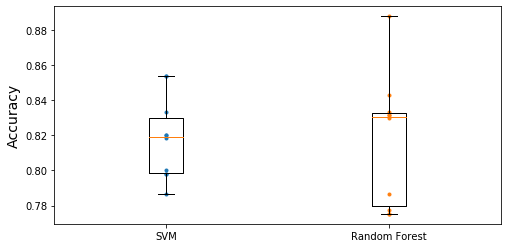

In [199]:
plt.figure(figsize=(8,4))
plt.plot([1]*10 ,svm_scores ,".")
plt.plot([2]*10 ,forest_scores ,".")
plt.boxplot([svm_scores ,forest_scores] ,labels=("SVM" ,"Random Forest"))
plt.ylabel("Accuracy" ,fontsize=14)
plt.show()

In [96]:
#import numpy as np

In [33]:
min(train_data["Age"])

0.42

In [175]:
train_data["AgeBucket"] = train_data["Age"] // 15.0*15.0
t = train_data["AgeBucket"]

In [190]:
test_data["AgeBucket"] = test_data["Age"] // 15.0*15.0

In [191]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativesOnboard,AgeBucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,15.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,15.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,30.0


In [192]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativesOnboard,AgeBucket
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,30.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,45.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,60.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,15.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,15.0


In [35]:
(train_data["Age"] //15*15).value_counts()

15.0    306
30.0    215
45.0     89
0.0      78
60.0     25
75.0      1
Name: Age, dtype: int64

In [57]:
import numpy as np

In [36]:
t.value_counts()

15.0    306
30.0    215
45.0     89
0.0      78
60.0     25
75.0      1
Name: AgeBucket, dtype: int64

In [37]:
tt = t // 15*15

In [65]:
#np.unique(train_data["AgeBucket"])

In [176]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [189]:
test_data["RelativesOnboard"] = test_data["SibSp"] + train_data["Parch"]

In [110]:
train_data[["AgeBucket","Survived"]].groupby(["AgeBucket"]).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [ ]:
# EXERCISE 4: SPAM CLASSIFIER

In [93]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [94]:
fetch_spam_data()

In [95]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [96]:
len(ham_filenames)

2500

In [97]:
len(spam_filenames)

500

In [98]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [99]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]